# SURVIVAL ANALYSIS ASSIGNMENT BY ENITA OMUVWIE

## Importing Libraries

In [1]:
# for survival analysis
import lifelines # pip install lifelines
import pandas as pd 
import seaborn as sns
import numpy as np 
import missingno
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


from sklearn.calibration import calibration_curve 
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import LabelEncoder

Survival analysis is the most common data analysis technique for evaluating the amount of time until an event of interest occurs.

In [2]:
# Load datasets
mortgage = pd.read_csv('./mortgage.csv')

In [3]:
# Check the datasets dimensions
print("Mortgage Shape", mortgage.shape)

Mortgage Shape (622489, 23)


In [4]:
print(mortgage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [6]:
mortgage['LTV_time'].value_counts()

80.000000    1347
82.410889     538
83.282882     486
83.632774     470
82.844919     465
             ... 
38.681815       1
38.659459       1
39.547359       1
62.866283       1
53.023479       1
Name: LTV_time, Length: 567800, dtype: int64

In [7]:
mortgage.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


## Data Preparation

In [13]:
mortgage = mortgage.dropna()
print(mortgage.shape)

(622219, 23)


<AxesSubplot:>

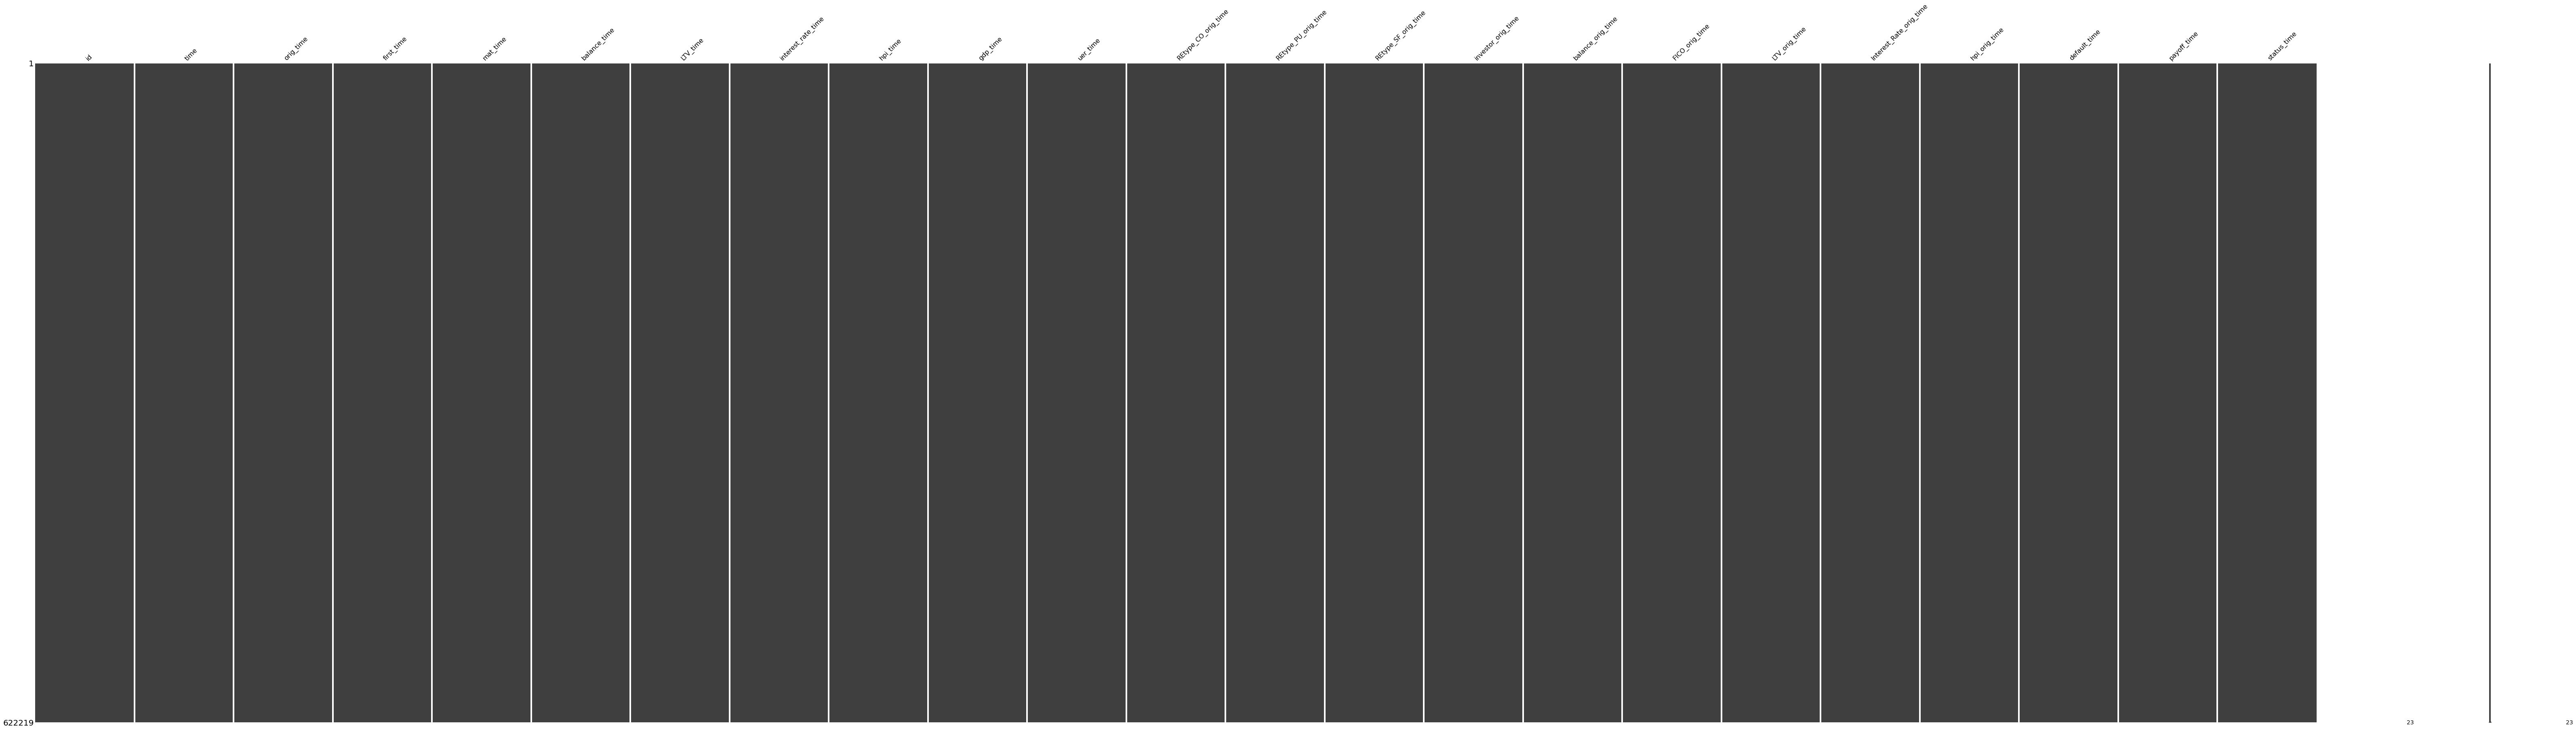

In [14]:
missingno.matrix(mortgage, figsize=(100, 30))

In [15]:
mortgage.isna().sum()

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
dtype: int64

In [19]:
#mortgage['LTV_time'] = mortgage['LTV_time'].fillna(mortgage.mean().round(1), inplace=True)
#mortgage['LTV_time'] = mortgage['LTV_time'].dropna(thresh=2)
mortgage.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


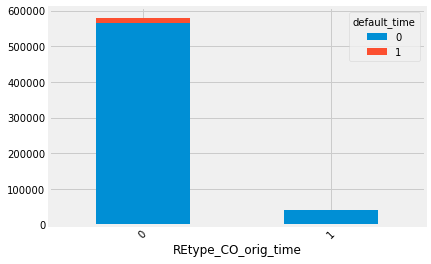

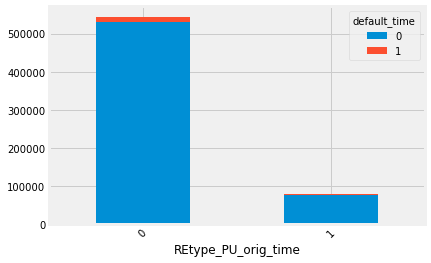

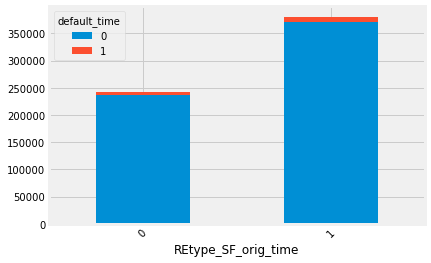

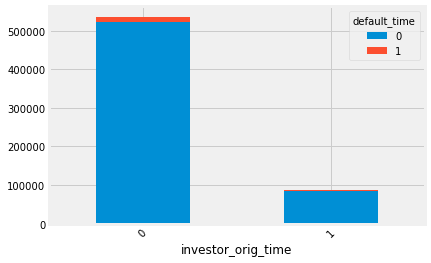

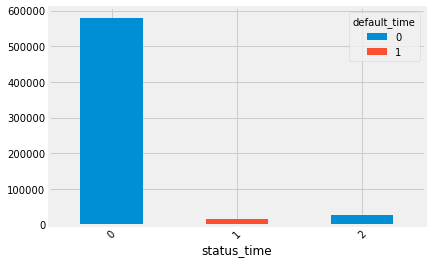

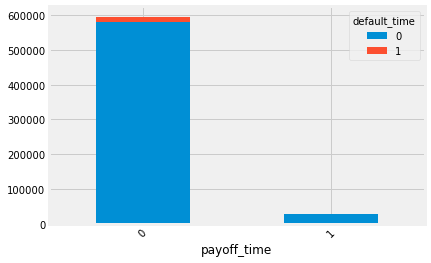

In [20]:
columns_to_visualise = ['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 
                        'investor_orig_time', 'status_time', 'payoff_time']

for column in columns_to_visualise:
    plot_data = mortgage.groupby([column, 'default_time']).size().reset_index().pivot(columns='default_time', index=column, values=0)
    plot_data.plot.bar(stacked=True, rot = 45)
    
plt.show()

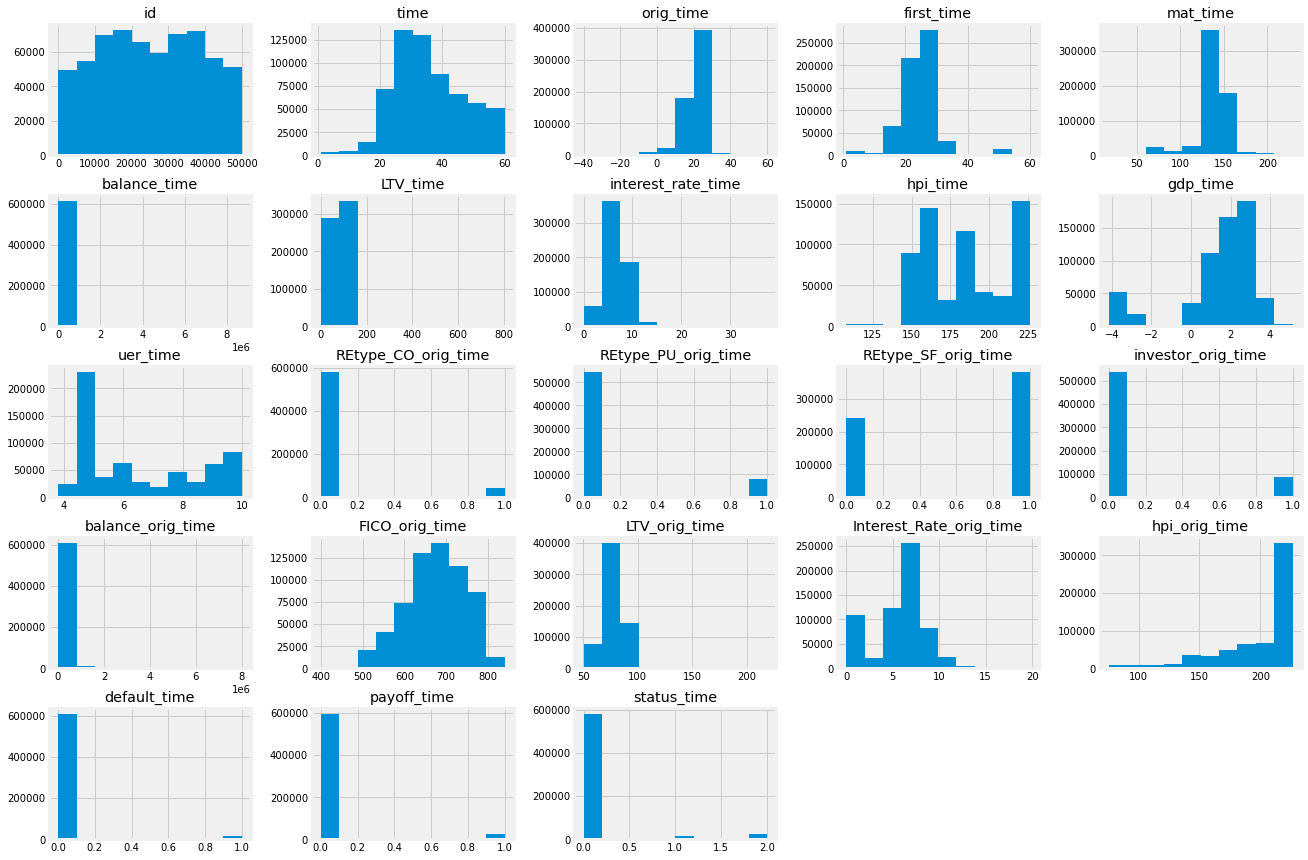

In [21]:
num_bins = 10

mortgage.hist(bins = num_bins, figsize=(20,15))
plt.savefig("Data_Histogram_Plots")
plt.show()

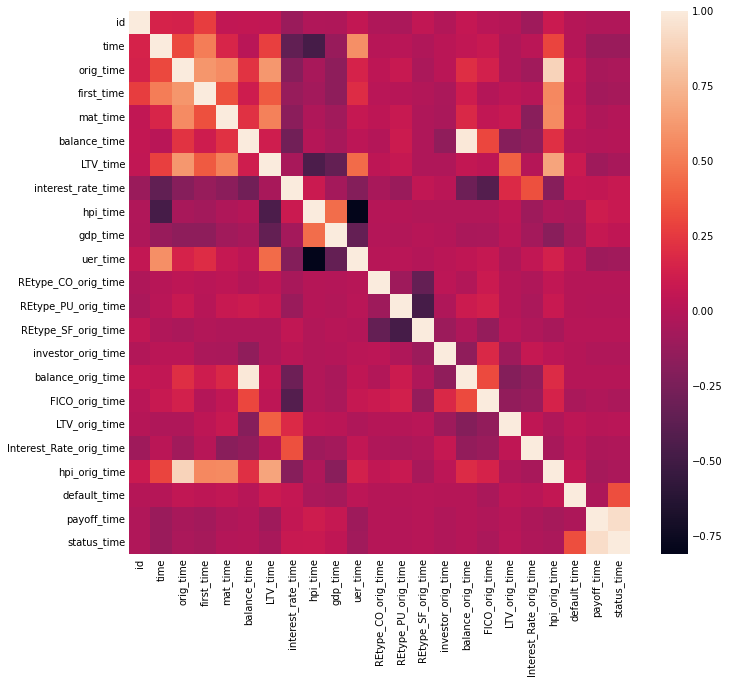

In [22]:
# Let's check for multicollinearity as it is a basic assumption of the CPH model
fig = plt.figure(figsize=(10,10))
corrmat = mortgage.corr()
sns.heatmap(corrmat);

In [23]:
# Look at the categorical and numerical variables 
summary_categorical = []
for column in mortgage.columns:
  if mortgage[column].dtype == object:
    summary_categorical.append(column)
    print(mortgage[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in mortgage.columns:
  if mortgage[column].dtype != object:
    print(f"{column} : Minimum: {min((mortgage[column].unique()))}, Maximum: {max((mortgage[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")

id : Minimum: 1, Maximum: 50000 
----------------------------------
time : Minimum: 1, Maximum: 60 
----------------------------------
orig_time : Minimum: -40, Maximum: 60 
----------------------------------
first_time : Minimum: 1, Maximum: 60 
----------------------------------
mat_time : Minimum: 18, Maximum: 229 
----------------------------------
balance_time : Minimum: 0.0, Maximum: 8701859.24 
----------------------------------
LTV_time : Minimum: 0.0, Maximum: 803.51354972 
----------------------------------
interest_rate_time : Minimum: 0.0, Maximum: 37.5 
----------------------------------
hpi_time : Minimum: 107.83, Maximum: 226.29 
----------------------------------
gdp_time : Minimum: -4.146710947, Maximum: 5.1324641859 
----------------------------------
uer_time : Minimum: 3.8, Maximum: 10.0 
----------------------------------
REtype_CO_orig_time : Minimum: 0, Maximum: 1 
----------------------------------
REtype_PU_orig_time : Minimum: 0, Maximum: 1 
------------------

In [24]:
# convert episodic data to static
mortgage_static = mortgage.groupby("id").agg(np.max).reset_index()

## KM Curves

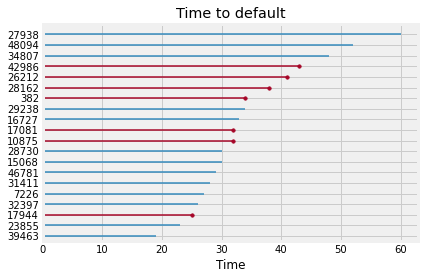

In [59]:
from lifelines.plotting import plot_lifetimes

df_samp = mortgage_static.sample(20)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["default_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

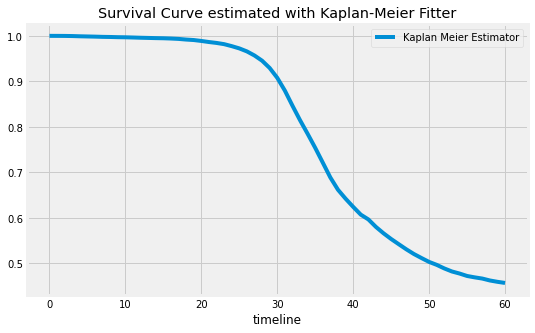

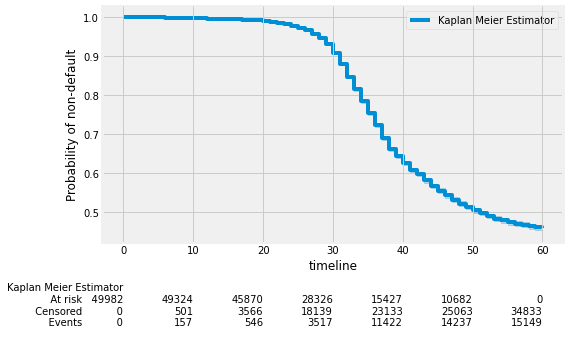

In [60]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, TARGET indicates whether the customer defaulted
kmf.fit(mortgage_static['time'], mortgage_static['default_time'], label='Kaplan Meier Estimator')

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.show()

In [61]:
kmf.survival_function_

,Kaplan Meier Estimator
timeline,
0.0,1.000000
1.0,0.999940
2.0,0.999840
3.0,0.999560
4.0,0.999058
...,...
56.0,0.469512
57.0,0.466888
58.0,0.462677


35.0


C:\Users\eomuvwie\AppData\Local\Temp/ipykernel_22220/2480392434.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([median_default, median_default], [0,1], 'k-', c="red")


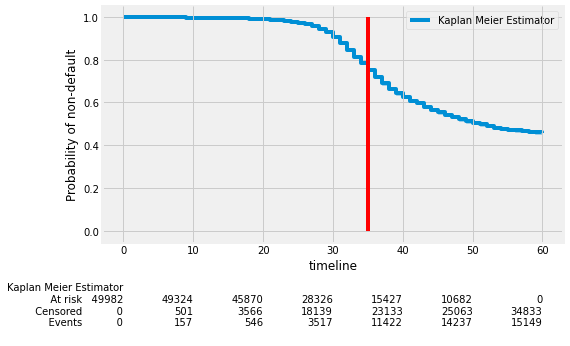

In [62]:
# Median default_time?
median_default = mortgage_static.query("default_time==1")["time"].median()
print(median_default)

# add to plot
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.plot([median_default, median_default], [0,1], 'k-', c="red")
plt.show()

In [63]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,49982,49982
1.0,22,3,19,0,49982
2.0,37,5,32,0,49960
3.0,57,14,43,0,49923
4.0,56,25,31,0,49866
...,...,...,...,...,...
56.0,223,58,165,0,8990
57.0,231,49,182,0,8767
58.0,245,77,168,0,8536


<AxesSubplot:xlabel='timeline'>

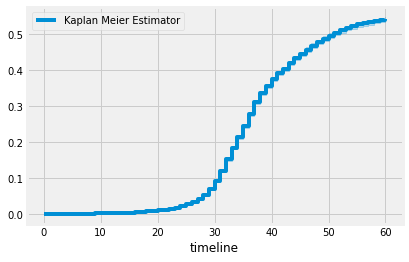

In [64]:
# plot cumulative hazard function
kmf.plot_cumulative_density()

In [65]:
# "predict" probability to default at time 60

# 1 - probability of non-default at time 60
1 - kmf.predict(50)

0.49656491256514723

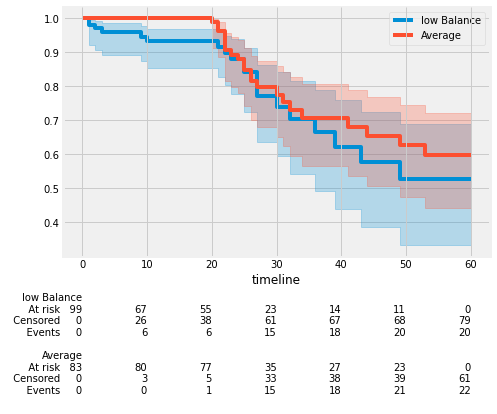

In [68]:
# Compare two groups

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(1,1 , figsize=(7,6))

# subset data
df01 = mortgage_static.loc[mortgage_static["orig_time"] == 1,:]
df02 = mortgage_static.loc[mortgage_static["orig_time"] == 0,:]

# fit subset orig_time = low balance
ax = kmf1.fit(df01['time'], df01['default_time'], label='low Balance').plot_survival_function(ax=ax)

# fit subset orig_time = average
ax = kmf2.fit(df02['time'], df02['default_time'], label='Average').plot_survival_function(ax=ax)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()

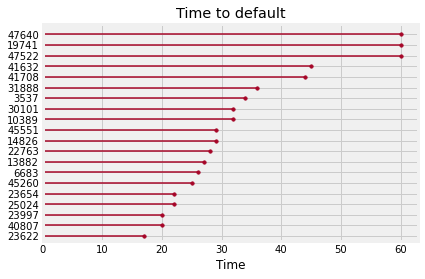

In [69]:
from lifelines.plotting import plot_lifetimes

df_samp = mortgage_static.sample(20)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["balance_orig_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

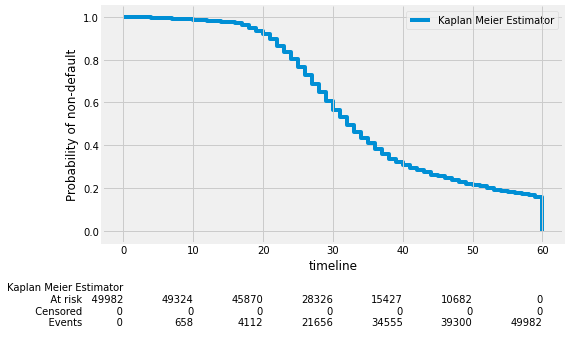

In [70]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, mortgage_static indicates whether the customer defaulted
kmf.fit(mortgage_static['time'], mortgage_static['balance_orig_time'], label='Kaplan Meier Estimator')

# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.show()

In [72]:
# Perform logrank test to assess whether there is a difference between Males and Females in time to default

from lifelines.statistics import logrank_test

# Null-Hypothesis: No difference between the two groups
res = logrank_test(df01['time'], df02['time'], event_observed_A=df01['default_time'],event_observed_B=df02['default_time'])

# We can reject the Null-Hypothesis (p < 0.05)
res.summary 

,test_statistic,p,-log2(p)
0,0.516972,0.472136,1.082725


## COX Fitter

In [29]:
# Exclude time varying variables
mortgage_sub = mortgage_static[["id","default_time", "hpi_time", "gdp_time", "uer_time", "balance_time",
"interest_rate_time", "FICO_orig_time", "LTV_time"]].set_index("id")

In [66]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# fit model on static data
cph.fit(mortgage_sub, 'balance_time', event_col='default_time')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
hpi_time,0.009427,1.009472,0.000637,0.008179,0.010675,1.008212,1.010733,0.0,14.801515,1.432196e-49,162.256248
gdp_time,-0.359223,0.698219,0.011197,-0.381169,-0.337277,0.683062,0.713711,0.0,-32.081673,7.943283e-226,747.766014
uer_time,0.028423,1.028831,0.003893,0.020793,0.036052,1.021011,1.036710,0.0,7.301684,2.841880e-13,41.678220
interest_rate_time,0.116789,1.123882,0.002162,0.112551,0.121026,1.119129,1.128655,0.0,54.014674,0.000000e+00,inf
FICO_orig_time,-0.007378,0.992649,0.000124,-0.007621,-0.007135,0.992408,0.992890,0.0,-59.567060,0.000000e+00,inf
LTV_time,0.006563,1.006585,0.000180,0.006209,0.006917,1.006229,1.006941,0.0,36.367947,1.367611e-289,959.585561


In [67]:
# Print model summary
cph.print_summary(model = 'base model', decimals = 3, columns = ['coef', 'exp(coef)', 'p']) 

C:\tools\Anaconda3\envs\py\lib\site-packages\lifelines\utils\printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns
C:\tools\Anaconda3\envs\py\lib\site-packages\lifelines\utils\printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns


<lifelines.CoxPHFitter: fitted with 49982 total observations, 34833 right-censored observations>
             duration col = 'balance_time'
                event col = 'default_time'
      baseline estimation = breslow
   number of observations = 49982
number of events observed = 15149
   partial log-likelihood = -143993.371
         time fit was run = 2022-05-06 18:56:49 UTC
                    model = base model

---
                     coef  exp(coef)       p
covariate                                   
hpi_time            0.009      1.009 <0.0005
gdp_time           -0.359      0.698 <0.0005
uer_time            0.028      1.029 <0.0005
interest_rate_time  0.117      1.124 <0.0005
FICO_orig_time     -0.007      0.993 <0.0005
LTV_time            0.007      1.007 <0.0005
---
Concordance = 0.723
Partial AIC = 287998.742
log-likelihood ratio test = 8894.525 on 6 df
-log2(p) of ll-ratio test = inf

The ``p_value_threshold`` is set at 0.001. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



C:\tools\Anaconda3\envs\py\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 49982 total observations, 34833 right-censored observations>
         test_name = proportional_hazard_test

---
                         test_statistic      p  -log2(p)
FICO_orig_time     km             36.43 <0.005     29.24
                   rank           68.80 <0.005     53.03
LTV_time           km             19.64 <0.005     16.71
                   rank           20.15 <0.005     17.09
gdp_time           km            390.59 <0.005    286.39
                   rank          542.09 <0.005    395.91
hpi_time           km            198.54 <0.005    147.36
                   rank          320.87 <0.005    235.95
interest_rate_time km              0.52   0.47      1.09
                   rank            1.36   0.24      2.04
uer_time           km              2.85   0.09      3.46
                   rank            0.60   0.44      1.19



1. Variable 'hpi_time' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'hpi_time' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'hpi_time' using pd.cut, and then specify it in
`strata=['hpi_time', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'gdp_time' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'gdp_time' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See document

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>]]

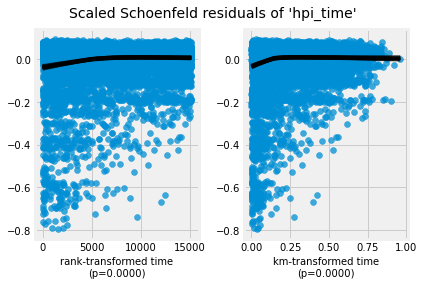

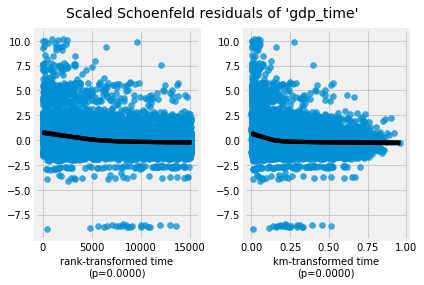

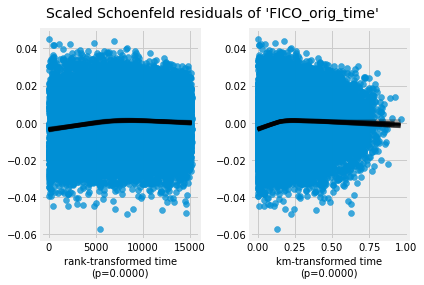

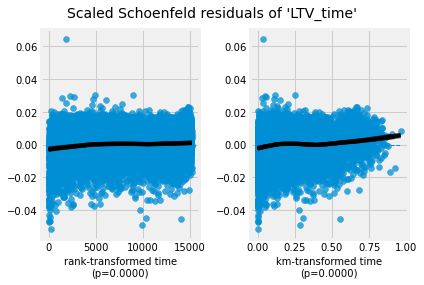

In [35]:
# Check model assumptions, with a threshold of 0.001 (i.e. only highlight extreme significances - rationale explained after the results)
cph.check_assumptions(mortgage_sub, p_value_threshold=0.001, show_plots=True)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

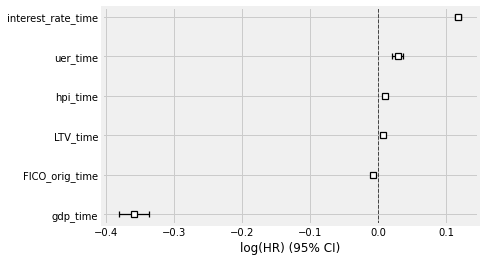

In [37]:
cph.plot()

In [46]:
print(cph.params_)

# Interpretation (under ceteris paribus assumption): 
print('\n 1 EUR in additional credit granted decreases the probability to default by {:.3f}%'.format((np.exp(0.000009) - 1)*100))

covariate
hpi_time              0.009311
gdp_time             -0.357736
uer_time              0.022723
interest_rate_time    0.116920
FICO_orig_time       -0.007279
LTV_time              0.007232
Name: coef, dtype: float64

 1 EUR in additional credit granted decreases the probability to default by 0.001%


<AxesSubplot:>

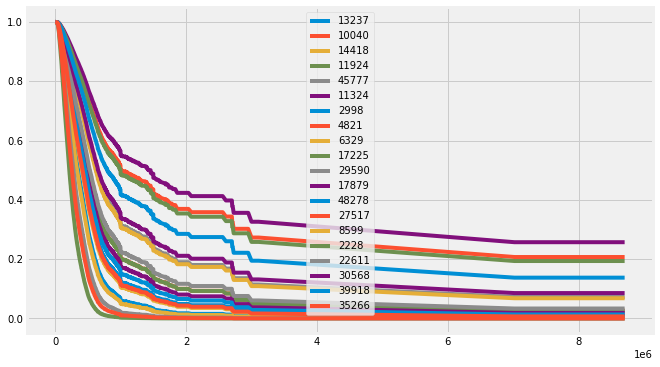

In [47]:
# Individual survival functions
cph.predict_survival_function(mortgage_sub.sample(20)).plot(figsize=(10,6))

In [48]:
# difference to logreg models:'intercept' term
cph.baseline_hazard_

,baseline hazard
0.00,0.000000
100.00,0.000000
261.53,0.000000
291.63,0.000000
455.10,0.000000
...,...
2950000.00,0.000000
3000000.00,0.250271
3106990.05,0.000000
7019196.39,0.674219


In [49]:
# Goodness of fit measure (can be interpreted similar to AUC)
cph.concordance_index_

0.7229490036806749

In [42]:
# Calculate the average Concordance Index of 5 folds
avg_score = np.mean(lifelines.utils.k_fold_cross_validation(cph, mortgage_sub, 'balance_time', 'default_time', k = 10, scoring_method = 'concordance_index'))
print('The average Concordance Score across 10 folds is: {:.3f}'.format(avg_score))

The average Concordance Score across 10 folds is: 0.723


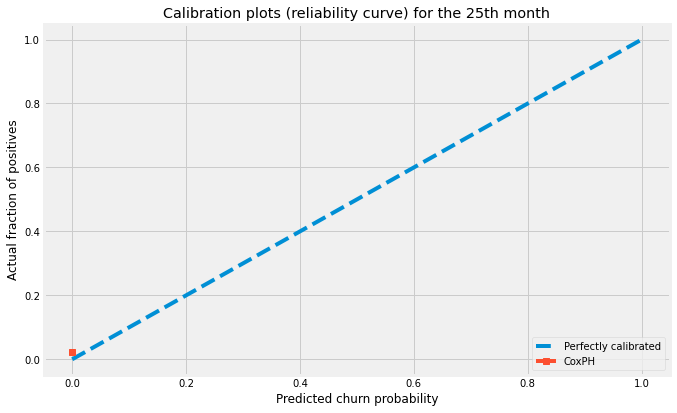

In [53]:
plt.figure(figsize=(10, 10))
 
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 

# Plot the perfectly calibrated line with 0 intercept and 1 slope
ax1.plot([0, 1], [0, 1], ls = '--', label = 'Perfectly calibrated') 

# Calculate the churn probabilities at the end of 25th month. predict_survival_function gives us the survival probability, which we have deducted from 1 to get the churn probability
probs = 1 - np.array(cph.predict_survival_function(mortgage, times = 25).T)

actual = mortgage['default_time'] 
# For each decile, the calibration curve will plot the mean predicted churn probability on the x-axis and its corresponding proportion of observations that actually churned on y-axis, in each bin
fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins = 10, strategy = 'quantile') 
ax1.plot(mean_predicted_value, fraction_of_positives, marker = 's', ls = '-', label='CoxPH') 

ax1.set_ylabel("Actual fraction of positives") 
ax1.set_xlabel("Predicted churn probability")
ax1.set_ylim([-0.05, 1.05]) 
ax1.legend(loc="lower right") 
ax1.set_title('Calibration plots (reliability curve) for the 25th month');

In [58]:
# calculate Brier Score
brier_score = brier_score_loss(mortgage['default_time'], 1 - np.array(cph.predict_survival_function(mortgage, times = 25).T), pos_label = 1)
print('The Brier Score of our CPH Model is {:.2f} at the end of 25 months'.format(brier_score))

The Brier Score of our CPH Model is 0.02 at the end of 25 months


In [73]:
# select variables used in previous model + time varying variables
mortgage_tv = pd.merge(mortgage[["id","default_time", "hpi_time", "gdp_time", "uer_time", "balance_time",
"interest_rate_time", "FICO_orig_time", "LTV_time"]], mortgage_static[["id", "time"]]\
.rename(columns={"time":"time_end"}), on="id", how="inner") 

# Assumption: time always starts at 0 (no interval censored data)
mortgage_tv["first_time"] = 0

In [76]:
# inspect p-values
round(cph.summary['p'], 100)

covariate
hpi_time              1.432196e-49
gdp_time              0.000000e+00
uer_time              2.841880e-13
interest_rate_time    0.000000e+00
FICO_orig_time        0.000000e+00
LTV_time              0.000000e+00
Name: p, dtype: float64

<AxesSubplot:xlabel='log(HR) (95% CI)'>

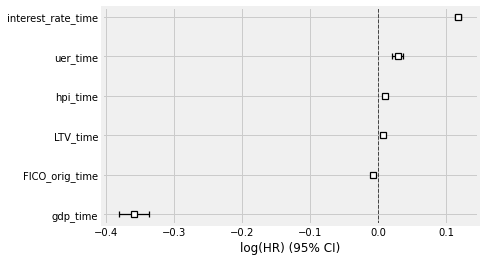

In [78]:
cph.plot()

In [ ]:
The graph shows the significant value of each factor variable
We can see that hpi_time and uer_time are significant variables


# References:

In [74]:
# References
#https://github.com/finlytics-hub/churn_model-survival-analysis
#https://github.com/Idilismiguzel/Machine-Learning/blob/master/Survival_Analysis/Survival_Analysis.ipynb
#https://github.com/finlytics-hub/churn_model-survival-analysis/blob/master/Customer_Churn_Model_Survival_Analysis.ipynb
#https://github.com/Feeledu
#https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03
#https://towardsdatascience.com/hands-on-survival-analysis-with-python-270fa1e6fb41